## Datasets for use with libpysal
As of version 4.2, libpysal has refactored the `examples` package to:

- reduce the size of the source installation
- allow the use of remote datasets from the [Center for Spatial Data Science at the Unversity of Chicago](https://spatial.uchicago.edu/), and other remotes

This notebook highlights the new functionality

## Backwards compatibility is maintained

If you were familiar with previous versions of libpysal, the newest version maintains backwards compatibility so any code that relied on the previous API should work. 

For example:

In [1]:
from libpysal.examples import get_path 


In [2]:
get_path("mexicojoin.dbf")

'/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/examples/mexico/mexicojoin.dbf'

An important thing to note here is that the path to the file for this particular example is within the source distribution that was installed. Such an example data set is now referred to as a `builtin` dataset.

In [3]:
import libpysal
dbf = libpysal.io.open(get_path("mexicojoin.dbf"))

In [4]:
dbf.header

['POLY_ID',
 'AREA',
 'CODE',
 'NAME',
 'PERIMETER',
 'ACRES',
 'HECTARES',
 'PCGDP1940',
 'PCGDP1950',
 'PCGDP1960',
 'PCGDP1970',
 'PCGDP1980',
 'PCGDP1990',
 'PCGDP2000',
 'HANSON03',
 'HANSON98',
 'ESQUIVEL99',
 'INEGI',
 'INEGI2',
 'MAXP',
 'GR4000',
 'GR5000',
 'GR6000',
 'GR7000',
 'GR8000',
 'GR9000',
 'LPCGDP40',
 'LPCGDP50',
 'LPCGDP60',
 'LPCGDP70',
 'LPCGDP80',
 'LPCGDP90',
 'LPCGDP00',
 'TEST']

## `available` is updated

The function `available` is also available but has been updated to return a Pandas DataFrame. In addition to the builtin datasets, `available` will fetch all available remote datasets that have not already been downloaded, and report if any remotes are unavailable:

In [21]:
from libpysal.examples import available
available()

Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


## Working with an example dataset

`explain` will render maps for an example if available

In [22]:
from libpysal.examples import explain
explain('Tampa1')

In [7]:
from libpysal.examples import load_example
tampa1 = load_example('Tampa1')

In [8]:
available()

Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


In [9]:
tampa1.installed

True

In [10]:
tampa1.get_file_list()

['/home/serge/pysal_data/Tampa1/__MACOSX/._TampaMSA',
 '/home/serge/pysal_data/Tampa1/__MACOSX/TampaMSA/._tampa_counties.sbn',
 '/home/serge/pysal_data/Tampa1/__MACOSX/TampaMSA/._tampa_final_census2.sbn',
 '/home/serge/pysal_data/Tampa1/__MACOSX/TampaMSA/._2000 Census Data Variables_Documentation.pdf',
 '/home/serge/pysal_data/Tampa1/__MACOSX/TampaMSA/._tampa_final_census2.sbx',
 '/home/serge/pysal_data/Tampa1/__MACOSX/TampaMSA/._tampa_counties.sbx',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_counties.prj',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_counties.shp',
 '/home/serge/pysal_data/Tampa1/TampaMSA/2000 Census Data Variables_Documentation.pdf',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_counties.kml',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_final_census2.gpkg',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_counties.shx',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_final_census2.mif',
 '/home/serge/pysal_data/Tampa1/TampaMSA/tampa_final_census2.dbf',
 '/home

In [11]:
tampa_counties_shp = tampa1.load('tampa_counties.shp')

In [12]:
tampa_counties_shp

In [13]:
import geopandas

In [14]:
tampa_df = geopandas.read_file(tampa1.get_path('tampa_counties.shp'))

<AxesSubplot:>

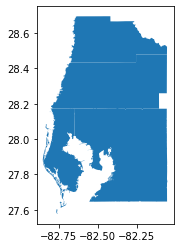

In [15]:
%matplotlib inline
tampa_df.plot()

## Other Remotes

In addition to the remote datasets from the GeoData Data Science Center, there are several large remotes available at github repositories. 

In [16]:
explain('Rio Grande do Sul')

Rio_Grande_do_Sul

Cities of the Brazilian State of Rio Grande do Sul
-------------------------------------------------------

* 43MUE250GC_SIR.dbf: attribute data (k=2)
* 43MUE250GC_SIR.shp: Polygon shapefile (n=499)
* 43MUE250GC_SIR.shx: spatial index
* 43MUE250GC_SIR.cpg: encoding file 
* 43MUE250GC_SIR.prj: projection information 
* map_RS_BR.dbf: attribute data (k=3)
* map_RS_BR.shp: Polygon shapefile (no lakes) (n=497)
* map_RS_BR.prj: projection information
* map_RS_BR.shx: spatial index



Source: Renan Xavier Cortes 
Reference: https://github.com/pysal/pysal/issues/889#issuecomment-396693495




Note that the `explain` function generates a textual description of this example dataset - no rendering of the map is done as the source repository does not include that functionality.

In [17]:
rio = load_example('Rio Grande do Sul')